# Example 1.1 - The Pig Problem #

A pig weighing 200 pounds gains 5 pounds per day and costs 45 cents a day to keep. The market price for pigs is 65 cents per pound, but is falling 1 cent per day. When should the pig be sold?

## **Variables**

$t =$ time (days)

$w =$  weight (lbs)

$p =$  price (\$ per lb)

$C =$  cost (\$)

$R =$  revenue (\$)

$P =$  profit (\$)

## **Assumptions**

$w = 200+5t$

$p = 0.65-0.01t$

$R = w\cdot p$

$C = 0.45t$

$P = R-C$

$0 \leq t \leq 65$

## **Objective**

Maximize $P$.

We begin by plotting $P(t)$ to get a general sense of where the maximum of the function is located.

In [1]:
w(t) = 200 + 5*t
p(t) = 0.65 - 0.01*t
R(t) = w(t) * p(t)
C(t) = 0.45*t
P(t) = R(t) - C(t)

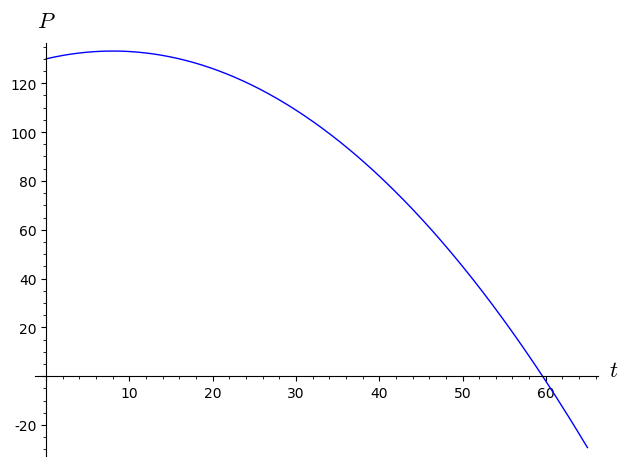

In [2]:
plot(P,(t,0,65),axes_labels=['$t$','$P$'])

This is a single variable optimization problem. We will determine the critical points of the profit function by solving the equation $P'(t) = 0$.

In [3]:
solve(P.diff(t)==0,t)

[t == 8]

The above computation shows that there is a critical point at $t=8$ days.

We use the 2nd derivative test to determine if the critical point is a local max or min.

In [4]:
PfirstDeriv(t) = P.diff()
PsecondDeriv(t) = PfirstDeriv.diff()

In [5]:
PsecondDeriv(8)

-0.100000000000000

Since $P''(8) < 0$, then our critical point is a local max. In fact, that graph of $P$ shows that this is the max value in the interval $[0,65]$

In [6]:
P(8)

133.200000000000

The optimal time to sell the pig is in 8 days, which gives a maximum profit of \$133.20.

We wish to compute the sensitivity of the optimal selling time with respect to the daily price drop for the pig. To do this we must create a profit function, $P_r$, of two variables, $t$ and $r$.

In [7]:
pr(t,r) = 0.65 - r*t
Rr(t,r) = w(t) * pr(t,r)
Pr(t,r) = Rr(t,r) - C(t)

In [8]:
sol = solve(Pr.diff(t)==0,t)
show(sol)

[t == -1/25*(500*r - 7)/r]

The above equality gives the optimal selling time as a function of the variable $r$. We refer to this function as $t_{op}$ and compute $S(t_{op},r).$

In [9]:
top(r) = sol[0].rhs()

In [10]:
top(r)

-1/25*(500*r - 7)/r

In [11]:
S_top_r(r) = top.diff()*r/top

In [12]:
S_top_r

r |--> -r^2*((500*r - 7)/r^2 - 500/r)/(500*r - 7)

In [13]:
show(S_top_r)

r |--> -r^2*((500*r - 7)/r^2 - 500/r)/(500*r - 7)

In [14]:
S_top_r(0.01)

-3.50000000000000

The above computation shows that if there is a 2% increase in $r$, then we expect a 7% decrease in the optimal selling time.


We wish to compute the sensitivity of the maximal profit with respect to the price drop rate for the pig. Using the work from above we see that the maximal profit, $P_{max}(r) = P_r(t_{op},r).$ This gives the maximal profit as a function of a single variable $r$, which allows us to compute $S(P_{max},r),$ the sensitivity of the maximal profit to $r.$

In [15]:
Pmax(r) = Pr(top(r),r)

In [16]:
show(Pmax(r))

-1/5*(20*r + 0.370000000000000)*((500*r - 7)/r - 1000) + 0.0180000000000000*(500*r - 7)/r

In [17]:
S_Pmax_r(r) = Pmax.diff()*r/Pmax

In [18]:
S_Pmax_r(0.01)

-0.144144144144144

The above computation shows that if the is a 1% increase in $r$, then we expect a 0.14% decrease in the optimal profit.